In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import pandas as pd

### Review of Lecture 19
In Lecture 19 we learned:
- how to deal with bivariate data (fitting lines, curves) 

- applied our knowledge to the determine the age of the Universe.  

### In this lecture we will:

- start to make some basic maps using **Basemap**. Yippee (I love maps).  






## Introduction to maps

Maps in Python are plotted using the tools in **matplotlib**'s **Basemap** module. So the first thing we have to do is import that.  The syntax is a bit different from what you are used to so pay attention.  There is a package for **matplotlib** called **mpl_toolkits** which has a bunch of, well, toolkits in it.  One of those is **Basemap**.  




In [2]:
#!conda install basemap --channel conda-forge
from mpl_toolkits.basemap import Basemap

There are many different types of maps used in the Earth Sciences.  A map tries to represent something that is essentially 3D (a globe) onto a 2D medium (paper or a computer screen).  So all maps, except those at the smallest scale, will increasingly distort the area as the scale increases because the Earth is not 2-dimensional. [No the Earth is not flat! https://en.wikipedia.org/wiki/Modern_flat_Earth_societies]

When we choose a map projection, we seek the one that distorts the least for our purpose.  

Here we will use a few popular projections, to make maps on both the global and local scale.  

### Mercator Projection
Let's begin with the standard Mercator Projection:

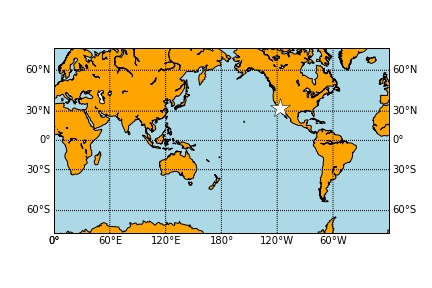

In [3]:
Image(filename='Figures/mercator.jpg',width=600)

Maps are instances of the **Basemap** class.  They have many methods, for example outlining continents, national boundaries, and state boundaries and plotting geospatial data, such as sampling locations, earthquakes, and much else.

Before we plot can plot a set of coordinates, they must be transformed from latitudes and longitudes to map coordinates and  then plotted like anything else in **matplotlib**.  

To make a map instance, we use **Basemap**. 

In [4]:
help(Basemap)

Help on class Basemap in module mpl_toolkits.basemap:

class Basemap(builtins.object)
 |  Methods defined here:
 |  
 |  __call__(self, x, y, inverse=False)
 |      Calling a Basemap class instance with the arguments lon, lat will
 |      convert lon/lat (in degrees) to x/y map projection
 |      coordinates (in meters).  If optional keyword ``inverse`` is
 |      True (default is False), the inverse transformation from x/y
 |      to lon/lat is performed.
 |      
 |      For cylindrical equidistant projection (``cyl``), this
 |      does nothing (i.e. x,y == lon,lat).
 |      
 |      For non-cylindrical projections, the inverse transformation
 |      always returns longitudes between -180 and 180 degrees. For
 |      cylindrical projections (self.projection == ``cyl``,
 |      ``cea``, ``mill``, ``gall`` or ``merc``)
 |      the inverse transformation will return longitudes between
 |      self.llcrnrlon and self.llcrnrlat.
 |      
 |      Input arguments lon, lat can be either sca

To set up the map, you need to know what type of projection you want (there are 34 to choose from) and depending on the projection type you need to know the map boundaries and other particulars.  

We are starting  with the Mercator projection.  To do this, we set the  projection keyword to 'merc'.  For this and other _cylindrical_ projections, you need to specify these keywords: 


llcrnrlon:        longitude of lower left hand corner of the desired map

llcrnrlat:        latitude of lower left hand corner of the desired map

urcrnrlon:        longitude of upper right hand corner of the desired map
      
urcrnrlat:        latitude of upper right hand corner of the desired map

We make the map instance with a call like:  

**m = Basemap(projection='merc',llcrnrlat=-70,urcrnrlat=70,llcrnrlon=0,urcrnrlon=360)**

We also have to put something on the map, so let's draw the coastlines by using the **drawcoastlines()** method: 

**m.drawcoastlines()**

Here's our  basic Mercator map of the whole world: 


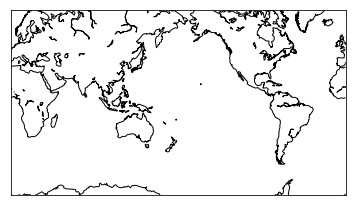

In [5]:
m = Basemap(projection='merc',llcrnrlat=-70,urcrnrlat=70,\
            llcrnrlon=0,urcrnrlon=360) # make a map instance called 'm'
m.drawcoastlines(); # put on the coastlines

We usually want lines of latitude (parallels) and longitude (meridians) on there as well, so we use the **drawparallels( )** and **drawmeridians( )** methods: 

**m.drawparallels( )** and **m.drawmeridens( )** with **NumPy** ndarrays passed that specify the desired lines.   

These methods take lists or arrays of numbers, so remember that you can make arrays using **np.arange( )**

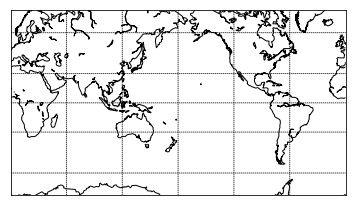

In [6]:
m = Basemap(projection='merc',llcrnrlat=-70,urcrnrlat=70,\
            llcrnrlon=0,urcrnrlon=360)
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,30.)) # plot the latitudes (parallels) from -90 to +90 in 30 degree intervals
m.drawmeridians(np.arange(-180.,181.,60.)); # same for longitudes (meridians) but with 60 degree intervals



And surely you want the lat/long labels to show, so you can modify your commands like this:

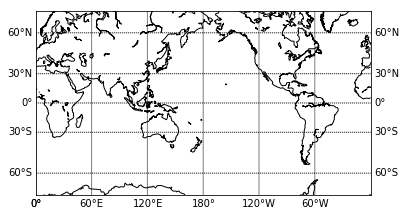

In [7]:
m = Basemap(projection='merc',llcrnrlat=-70,urcrnrlat=70,\
            llcrnrlon=0,urcrnrlon=360)
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,30.),labels=[True,True,False,False])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[False,False,False,True]);

The labels keyword tell the map object where to put the labels (left, right, top and bottom).  

Now maybe you want some color?  You can set the color of the continents with:

**m.fillcontinents(color='orange')**

and color in the oceans with: 

**m.drawmapboundary(fill_color='lightblue')**



/Users/hannaasefaw/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/hannaasefaw/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


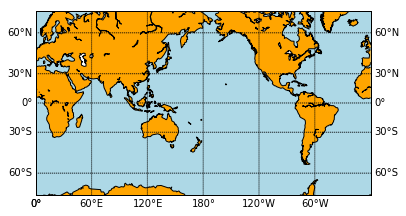

In [8]:
m = Basemap(projection='merc',llcrnrlat=-70,urcrnrlat=70,\
            llcrnrlon=0,urcrnrlon=360)
m.drawcoastlines()
m.drawparallels(np.arange(-90.,91.,30.),labels=[True,True,False,False])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[False,False,False,True])
m.fillcontinents(color='orange')
m.drawmapboundary(fill_color='lightblue');


Never mind about the deprecation warnings - that is for the developers of **matplotlib** to sort out.  
we can suppress them this way:  

In [9]:
import warnings
warnings.filterwarnings("ignore")

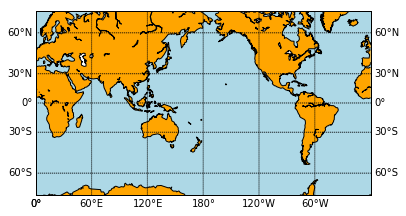

In [10]:
m = Basemap(projection='merc',llcrnrlat=-70,urcrnrlat=70,\
            llcrnrlon=0,urcrnrlon=360)
m.drawcoastlines()
m.fillcontinents(color='orange')
m.drawparallels(np.arange(-90.,91.,30.),labels=[True,True,False,False])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[False,False,False,True])
m.drawmapboundary(fill_color='lightblue');


What we don't know won't hurt us (for now).  :) 



Can you see  that Lake Baikal and the Great Lakes are colored white?  You can change lake colors using the **lake_color** keyword:

**m.fillcontinents(color='orange',lake_color='lightblue')**


You also want to put something ON the map?  No problem.  Just take your latitude and longitude (or arrays of them) and convert them to map coordinates.  These you plot just like any ordinary **matplotlib** plot.  

Let's plot the position of San Diego as a big white star:  


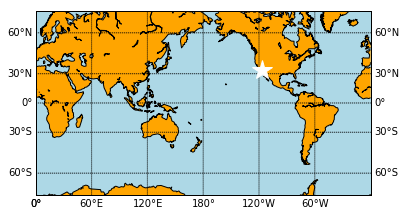

In [11]:
m = Basemap(projection='merc',llcrnrlat=-70,urcrnrlat=70,\
            llcrnrlon=0,urcrnrlon=360)
m.drawcoastlines()
m.fillcontinents(color='orange',lake_color='lightblue')
m.drawparallels(np.arange(-90.,91.,30.),labels=[True,True,False,False])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[False,False,False,True])
m.drawmapboundary(fill_color='lightblue')
# set the lat and long of San Diego
San_lat=33
San_lon=-117%360  # takes the west longitude and converts to 0=>360
x,y=m(San_lon,San_lat) # this will convert the lat,lon info to map coordinates x,y
plt.plot(x,y,'w*',markersize=20); # markersize sets the size of the marker

### Orthographic Projection

The Mercator is a nice classical map, but it sure does distort the map at high latitudes. Think back to the lecture on the hypsometric curves...  

Another type of map projection is the orthographic projection which is much less distorted. The downside to this projection is that you cannot see the whole globe at once.   To create an orthographic map, you initialize a map instance with the arguments **lon_0** and **lat_0** - the central longitude and latitude- instead of the lower left/upper right corner syntax. 

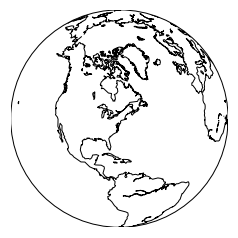

In [12]:
m = Basemap(projection='ortho',lon_0=-75,lat_0=42)
m.drawcoastlines();

And finish the map as before.  

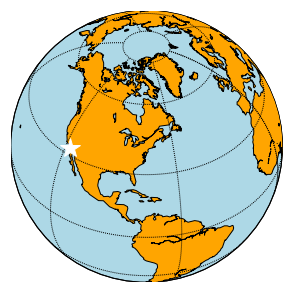

In [13]:
plt.figure(1,(5,5)) # this makes it a bit bigger with the size tuple (5,5)
m = Basemap(projection='ortho',lon_0=-75,lat_0=42)
m.drawcoastlines()
m.fillcontinents(color='orange',lake_color='lightblue')
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
m.drawmapboundary(fill_color='lightblue')
x,y=m(San_lon,San_lat)
plt.plot(x,y,'w*',markersize=20);

### Hammer projection

One more global scale example of a map projection is the Hammer projection (one of my favorites).   This is always a global map centered on the equator, so all you need to specify is the central longitude (with the lon_0 argument). 

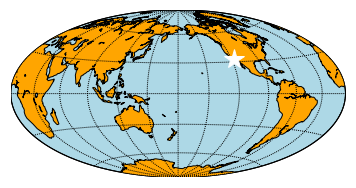

In [14]:
m = Basemap(projection='hammer',lon_0=180) # make a Hammer map object
m.drawcoastlines()
m.fillcontinents(color='orange',lake_color='lightblue')
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,30.))
m.drawmapboundary(fill_color='lightblue')
x,y=m(San_lon,San_lat)
plt.plot(x,y,'w*',markersize=20);

### Lambert conformal conic projections (lcc)

The maps we've explored so far are well and good for global scale problems, for example plotting the locations of earthquakes around the globe, but not so great for more local problems, like a map of sampling sites.  For this we need a smaller scale map and the Lambert confomal conic projection is a popular choice.  For this we must specify the map boundaries (with, e.g., llcrnrlon....)  and the central latitude and longitude (with lat_0 and lon_0).  

Here's what we know so far: 

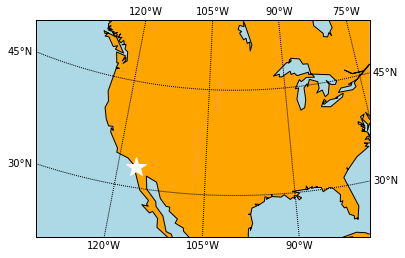

In [15]:
# set up the Lambert conformal conic projection (lcc)
m = Basemap(projection='lcc',\
            llcrnrlon=-130,llcrnrlat=20,urcrnrlon=-70,urcrnrlat=52,\
           lat_0=33,lon_0=-100)
m.drawcoastlines()
m.drawmapboundary(fill_color='lightblue') # color in the ocean blue

m.fillcontinents(color='orange',lake_color='lightblue') # make the land orange
# draw parallels and meridians.
m.drawparallels(np.arange(30.,50.,15.),labels=[True,True,False,False])
m.drawmeridians(np.arange(-120.,-65,15.),labels=[False,False,True,True])
x,y=m(San_lon,San_lat)
plt.plot(x,y,'w*',markersize=20);



But it sure would be nice to put on national and state boundaries. We can draw the national boundaries in a thick line like this:  

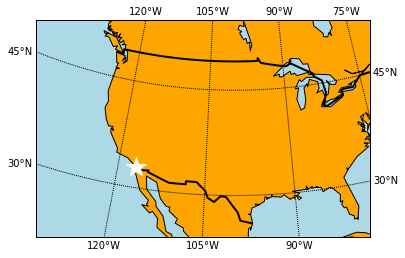

In [16]:
# set up the Lambert conformal conic projection (lcc)
m = Basemap(projection='lcc',\
            llcrnrlon=-130,llcrnrlat=20,urcrnrlon=-70,urcrnrlat=52,\
           lat_0=33,lon_0=-100)
m.drawcoastlines()
m.drawmapboundary(fill_color='lightblue') # color in the ocean blue

m.fillcontinents(color='orange',lake_color='lightblue') # make the land tan
# draw parallels and meridians.
m.drawparallels(np.arange(30.,50.,15.),labels=[True,True,False,False])
m.drawmeridians(np.arange(-120.,-65,15.),labels=[False,False,True,True])
x,y=m(San_lon,San_lat)
plt.plot(x,y,'w*',markersize=20);


# Here is the new stuff:

m.drawcountries(color='black',linewidth=2); # put on the countries


And finish off with the state boundaries like this: 

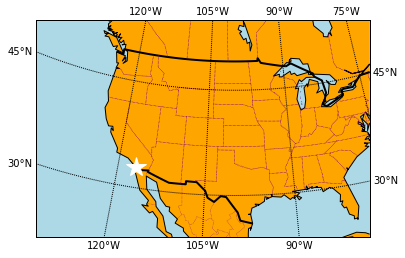

In [17]:
# set up the Lambert conformal conic projection (lcc)
m = Basemap(projection='lcc',\
            llcrnrlon=-130,llcrnrlat=20,urcrnrlon=-70,urcrnrlat=52,\
           lat_0=33,lon_0=-100)
m.drawcoastlines()
m.drawmapboundary(fill_color='lightblue') # color in the ocean blue

m.fillcontinents(color='orange',lake_color='lightblue') # make the land tan
# draw parallels and meridians.
m.drawparallels(np.arange(30.,50.,15.),labels=[True,True,False,False])
m.drawmeridians(np.arange(-120.,-65,15.),labels=[False,False,True,True])
x,y=m(San_lon,San_lat)
plt.plot(x,y,'w*',markersize=20)
m.drawcountries(color='black',linewidth=2)
m.drawstates(color='purple',linestyle='dotted'); # put on the states




You might also want to know that there are other options for background colors (see https://matplotlib.org/basemap/users/geography.html).  

For example, you can use the NASA Blue Marble image, a shaded topo image or the etopo relief image as a background:  

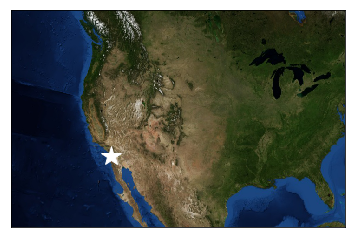

In [18]:
# set up the Lambert conformal conic projection (lcc)
m = Basemap(projection='lcc',\
            llcrnrlon=-130,llcrnrlat=20,urcrnrlon=-70,urcrnrlat=52,\
           lat_0=33,lon_0=-100)
m.bluemarble()
x,y=m(San_lon,San_lat)
plt.plot(x,y,'w*',markersize=20);



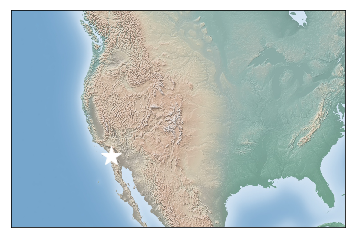

In [19]:
# set up the Lambert conformal conic projection (lcc)
m = Basemap(projection='lcc',\
            llcrnrlon=-130,llcrnrlat=20,urcrnrlon=-70,urcrnrlat=52,\
           lat_0=33,lon_0=-100)
m.shadedrelief()
x,y=m(San_lon,San_lat)
plt.plot(x,y,'w*',markersize=20);




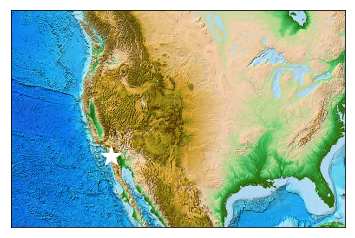

In [20]:
m = Basemap(projection='lcc',\
            llcrnrlon=-130,llcrnrlat=20,urcrnrlon=-70,urcrnrlat=52,\
           lat_0=33,lon_0=-100)
m.etopo()
x,y=m(San_lon,San_lat)
plt.plot(x,y,'w*',markersize=20);



And now for some science! 


### Earthquake locations - last 5 years

Remember the data we've been using with latitude and longitude coordinates? Now we can place those on our maps!  Here are all the earthquakes that have occured over a five year period with magnitudes greater than or equal to 5. The data come from:  http://earthquake.usgs.gov/earthquakes/search/ 

Let's take a look:  


In [21]:
!head Datasets/EarthquakeLocations/last5Years.csv

http://earthquake.usgs.gov/fdsnws/event/1/query.csv?starttime=2011-12-09%2000:00:00&endtime=2016-12-16%2023:59:59&minmagnitude=5&orderby=time
time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
2016-12-15T22:23:28.760Z,-9.9259,160.5101,35,5.3,mb,,32,0.736,1.14,us,us2000815j,2016-12-15T22:40:35.040Z,"82km SE of Honiara, Solomon Islands",earthquake,5.9,2,0.043,184,reviewed,us,us
2016-12-15T01:29:27.610Z,-29.1659,61.0004,13.71,5.3,mb,,62,9.275,1.29,us,us200080w8,2016-12-15T01:57:38.040Z,"Southwest Indian Ridge",earthquake,10.9,3.6,0.065,80,reviewed,us,us
2016-12-15T01:06:28.010Z,10.1317,126.1709,80.09,5.1,mb,,103,3.098,1.16,us,us200080vz,2016-12-15T07:52:00.028Z,"16km NE of San Isidro, Philippines",earthquake,10.1,11.1,0.158,13,reviewed,us,us
2016-12-15T00:18:43.610Z,-21.8244,-174.5947,10,5.2,mb,,67,5.16,1.36,us,us200080vn,2016-12-15T02:00:07.507Z,"65km SE of `Ohonua, Tonga",earthqu

So we have to skip the first row (by setting the keyword **skiprows** to 1).  

In [22]:
eq_data=pd.read_csv('Datasets/EarthquakeLocations/last5Years.csv',skiprows=1)
eq_data.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

There is a lot of information in this file, but the most important (for now)  is the latitude and longitude.  We can deal with the depth and magnitude later.  

For now, let's extract that location information into arrays. 

Remember, this is how you get stuff out of a Pandas **DataFrame**   into **NumPy** arrays: 


In [23]:
lats=eq_data.latitude.values #make an array of the values of a pandas Series
lons=eq_data.longitude.values
print (lats)
print (lons)

[ -9.9259 -29.1659  10.1317 ...,  11.077   -0.863   47.009 ]
[ 160.5101   61.0004  126.1709 ...,  125.999   126.907   144.551 ]


Now we can  plot these on a Hammer projection. Everything is just as we did before, except  I'm putting on the earthquake locations as white dots. The size of the dots can be set with the keyword **markersize**.  

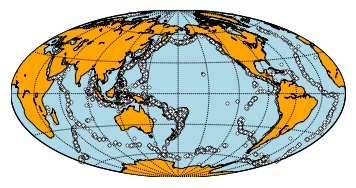

In [24]:
m = Basemap(projection='hammer',lon_0=180) # make the Hammer projection instance 'm'
m.drawcoastlines() # put on the coastlines
m.fillcontinents(color='orange',lake_color='lightblue')
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,30.))
m.drawmapboundary(fill_color='lightblue')
x, y = m(lons,lats) # convert the locations to map coordinates
plt.scatter(x,y,marker='o',c='white',edgecolors='black',linewidth=.5,s=10);  #new matplotlib function .scatter



So this plot used a new **matplotlib** (**plt**) function called **plt.scatter( )**.  This one is useful for plotting points as it has a lot more options for point styles than good old **plt.plot( )**.  

In [25]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)
    Make a scatter plot of `x` vs `y`.
    
    Marker size is scaled by `s` and marker color is mapped to `c`.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data
    
    s : scalar or array_like, shape (n, ), optional
        size in points^2.  Default is `rcParams['lines.markersize'] ** 2`.
    
    c : color, sequence, or sequence of color, optional, default: 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs
        (see below). Note that `c` should not be a single numeric RGB or
        RGBA sequence because that is indistinguishable from an arra

And did you notice how most of  the earthquakes fall in narrow bands?  Those are the plate boundaries you have have heard so much about of course. 

You might have also heard that earthquakes at trenches (like around the Pacific ocean's 'ring of fire') get deeper in a systematic way and reveals the location of the downgoing slabs.  

Included with this dataset, is the depth of the earthquakes, so we could color code the dots by depth and try to see the pattern.  

First let's see the range and frequency of different depths.  We can plot them in a histogram to take a quick peek.  

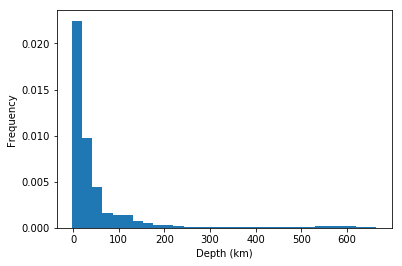

In [26]:
plt.hist(eq_data.depth.values,bins=30,normed=True)
plt.xlabel('Depth (km)')
plt.ylabel('Frequency');

The majority of earthquakes occur in the top 30-50 km but they continue all the way down to 650 km.  So let's make  some bins to group the data by depth.  We'll then color code the earthquakes, like the visible light spectrum, with the deepest earthquakes plotted as red.  


In [27]:
depths=[33,70,150,300,400,650] # a list of depth bins
colors=['purple','blue','lightblue','green','yellow','orange','red']

Putting it all together:

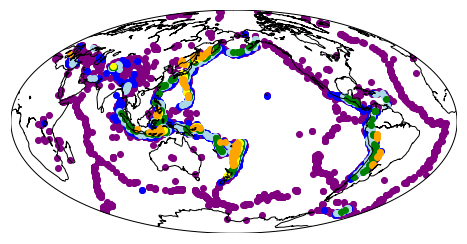

In [28]:
# this is just like before except for the background color (now white) 
plt.figure(1,(8,8)) # make a big figure (8x8)
m = Basemap(projection='hammer',lon_0=180) # Hammer projection with central longitude of 180
m.drawcoastlines()
#  left out some fiddly bits to keep the map simple
# now we put on the earthquakes
last_bin=0 # this is the lower bound of the first bin for depths
# or the upper bound of the last bin (same thing)
for d in depths: # step through the depths list
    # use Pandas filtering to fish out depths in this range
    depth=eq_data[(eq_data.depth<d)&(eq_data.depth>=last_bin)]  # use the filtering of Pandas
    # convert to map coordinates
    x, y = m(depth.longitude.values,depth.latitude.values)
    # put this batch of earthquakes on the map
    m.scatter(x,y,marker='o',color=colors[depths.index(d)]) 
    # replace the lower depth bound with the upper one
    last_bin=d # increment the lower bound for the bin




Well, at least we see that the ridges all have shallow earthquakes and the deepest earthquakes are the farthest from the trench - to really see the so-called 'Benioff zones' we should use 3D plots and zoom in on the area of interest.  We will learn 3D plotting tricks soon, so be patient. :) 

One last thing.  I keep talking about 'map coordinates'.  What are they and how can I see them?   All you have to do to get the map coordinate from a particular lon/lat point is to print it out: 

In [29]:
m(San_lon,San_lat)

(24049468.398121927, 12756991.306588462)

And if you want to go back the other way, just set the **inverse** argument to True

In [30]:
m(24049468.39812192, 12756991.306588462,inverse=True)

(-117.0000000000001, 33.0)